Hamiltonian Workbook

Tutors:
* Anthropic's AI Claude

# Hamiltonians in Physics: A High-Level Summary

Hamiltonians, named after William Rowan Hamilton, are fundamental concepts in classical and quantum mechanics. They provide a mathematical framework for describing the total energy of a physical system and are crucial for understanding the system's dynamics and evolution over time.

Key points about Hamiltonians:

1. Definition: The Hamiltonian (H) of a system is defined as the sum of its kinetic energy (T) and potential energy (V): H = T + V.

2. Classical Mechanics: In classical mechanics, the Hamiltonian is a function of position and momentum variables, representing the total energy of the system.

3. Quantum Mechanics: In quantum mechanics, the Hamiltonian becomes an operator, acting on the wave function to determine the system's energy states.

4. Hamilton's Equations: These equations describe the time evolution of a system in terms of its Hamiltonian, providing an alternative formulation to Newton's laws of motion.

5. Conservation of Energy: For many systems, the Hamiltonian is conserved over time, reflecting the principle of conservation of energy.

6. Applications: Hamiltonians are used in various fields of physics, including particle physics, solid-state physics, and quantum field theory, to model and analyze complex systems.

7. Perturbation Theory: Hamiltonians are often used in perturbation theory to approximate solutions for systems that cannot be solved exactly.

Understanding Hamiltonians is crucial for advanced studies in physics, as they provide a powerful tool for analyzing and predicting the behavior of physical systems across different scales and domains.

# Glossary of Terms and Symbols Related to Hamiltonians

| Symbol/Term | Description |
|-------------|-------------|
| H           | Hamiltonian (total energy of the system) |
| T           | Kinetic energy |
| V           | Potential energy |
| q           | Generalized position coordinate |
| p           | Generalized momentum coordinate |
| t           | Time |
| ∂           | Partial derivative symbol |
| ℏ           | Reduced Planck's constant (h/2π) |
| Ψ           | Wave function (in quantum mechanics) |
| Ĥ           | Hamiltonian operator (in quantum mechanics) |
| E           | Energy eigenvalue |
| \|ψ⟩        | State vector (in Dirac notation) |
| [A, B]      | Commutator of operators A and B |
| U(t)        | Time evolution operator |
| ω           | Angular frequency |
| λ           | Coupling constant or perturbation parameter |
| ∇           | Gradient operator |
| i           | Imaginary unit (√-1) |
| δ           | Small change or variation |
| ∫           | Integral symbol |

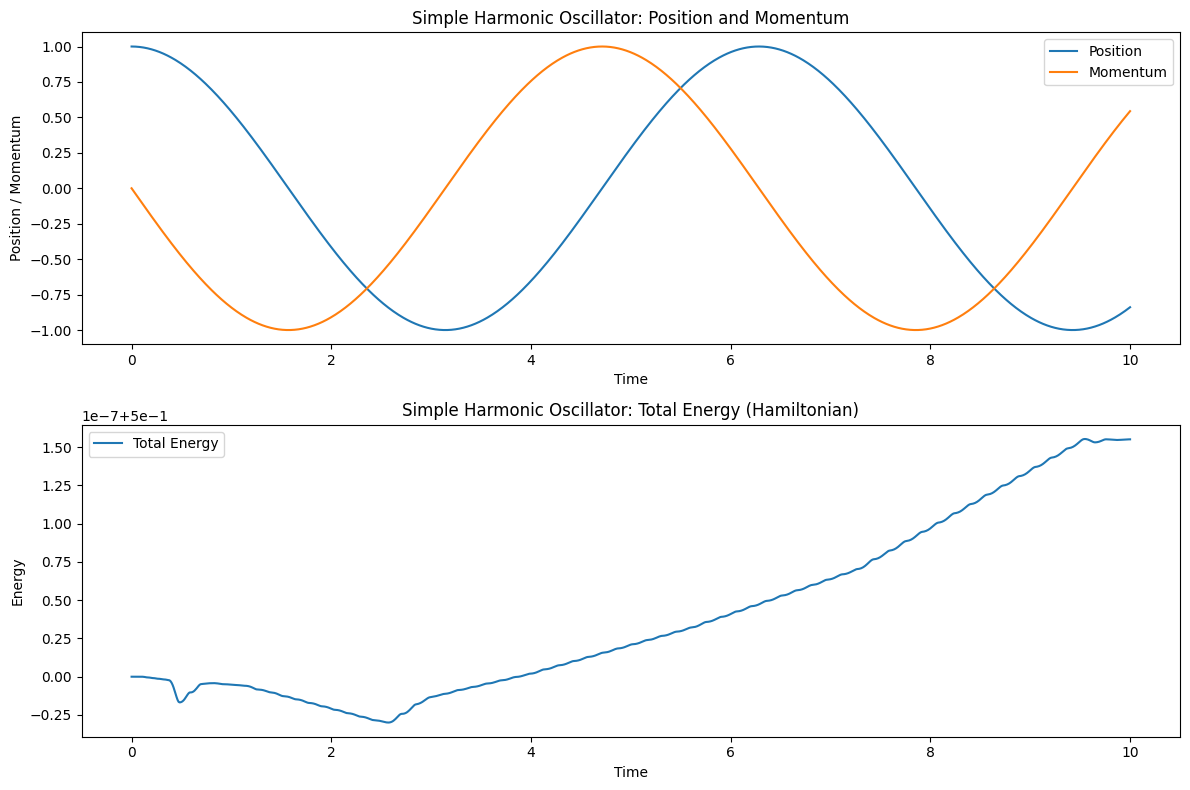

Initial energy: 0.500000
Final energy: 0.500000
Energy conservation error: 1.550296e-07


In [1]:
"""
Abstract:
This script demonstrates the application of Hamiltonian mechanics to a simple harmonic oscillator.
It solves Hamilton's equations of motion for a one-dimensional oscillator and visualizes the results.
The script calculates and plots the position, momentum, and total energy of the system over time,
illustrating key concepts such as phase space dynamics and conservation of energy in Hamiltonian systems.
This toy problem serves as an accessible introduction to Hamiltonian mechanics and its implementation in Python.

Author: Claude
Date: September 29, 2024
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def hamiltonian(state, t, m, k):
    """
    Compute the Hamiltonian (total energy) of a simple harmonic oscillator.

    The Hamiltonian is the sum of kinetic and potential energy:
    H = T + V = p^2 / (2m) + (1/2) * k * x^2

    :param state: Array of [position, momentum]
    :param t: Time (not used in this time-independent Hamiltonian)
    :param m: Mass of the oscillator
    :param k: Spring constant
    :return: Total energy (Hamiltonian)
    """
    x, p = state
    T = p**2 / (2*m)  # Kinetic energy
    V = 0.5 * k * x**2  # Potential energy
    return T + V

def hamilton_equations(state, t, m, k):
    """
    Hamilton's equations of motion for a simple harmonic oscillator.

    These equations are derived from the Hamiltonian:
    dx/dt = ∂H/∂p = p/m
    dp/dt = -∂H/∂x = -kx

    :param state: Array of [position, momentum]
    :param t: Time
    :param m: Mass of the oscillator
    :param k: Spring constant
    :return: [dx/dt, dp/dt]
    """
    x, p = state
    dxdt = p / m  # Rate of change of position
    dpdt = -k * x  # Rate of change of momentum
    return [dxdt, dpdt]

# Set up parameters
m = 1.0  # mass of the oscillator
k = 1.0  # spring constant
omega = np.sqrt(k/m)  # angular frequency of the oscillator

# Initial conditions
x0, p0 = 1.0, 0.0  # starting with displacement 1 and zero momentum
initial_state = [x0, p0]

# Time array for simulation
t = np.linspace(0, 10, 1000)  # 10 seconds, 1000 points

# Solve Hamilton's equations using scipy's odeint function
solution = odeint(hamilton_equations, initial_state, t, args=(m, k))

# Extract position and momentum from the solution
x, p = solution.T

# Calculate energy at each point in time
energy = [hamiltonian([xi, pi], 0, m, k) for xi, pi in zip(x, p)]

# Plot results
plt.figure(figsize=(12, 8))

# Plot position and momentum vs time
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Position')
plt.plot(t, p, label='Momentum')
plt.xlabel('Time')
plt.ylabel('Position / Momentum')
plt.title('Simple Harmonic Oscillator: Position and Momentum')
plt.legend()

# Plot total energy vs time
plt.subplot(2, 1, 2)
plt.plot(t, energy, label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Simple Harmonic Oscillator: Total Energy (Hamiltonian)')
plt.legend()

plt.tight_layout()
plt.show()

# Print energy values to verify conservation
print(f"Initial energy: {energy[0]:.6f}")
print(f"Final energy: {energy[-1]:.6f}")
print(f"Energy conservation error: {abs(energy[-1] - energy[0]):.6e}")

# Note: In an ideal simulation, the energy should be perfectly conserved.
# Small numerical errors are expected due to the numerical integration method.